In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
class LogicalRegression:
  def __init__(self,lr=0.001,iters=1000):
    self.lr = lr
    self.iters = iters
    self.weights = None
    self.bias = None
  
  def fit(self,X,y): #X=MxN (M rows N features)
    n_samples, n_features = X.shape
    self.weight = np.zeroes(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.iters):
      linear_model = np.dot(X,self.weights)+self.bias     #f(w,b)=w*x+b
      y_pred = self.sigmoid(linear_model) #aproximation of y

      #update weights
      dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
      db = (1/n_samples)*np.sum(y_pred-y)
      self.weights -= self.lr*dw
      self.bias -= self.lr*db

  
  def predict(self,X):
    linear_model = np.dot(X,self.weights)+self.bias     #f(w,b)=w*x+b
    y_pred = self.sigmoid(linear_model) #aproximation of y
    y_pred_class = [1 if i>0.5 else 0 for i in y_pred] #assign classes based on probablity
    return y_pred_class

  def sigmoid(self,x): #apply sigmoid to get probablity
    return 1/(1+np.exp(-x))


In [8]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088


In [14]:
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

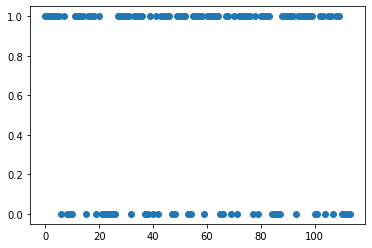

In [15]:
plt.scatter([i for i in range(len(X_test))],predictions)